# Treatment of Scientific Data

#### Looking at the sugars in apple juice (concentration of g/L) from three different sources (A, B, C).
##### Methods: Basic descriptive & relationship analysis with principal component analysis (PCA).

In [219]:
## Import pandas package to upload data.
import pandas as pd
df = pd.read_csv("Sugars_In_apple_juice.csv")

## Show first few rows of data.
print(df.head(5))

## Dimensions of data matrix
print(df.shape)


  Variety  sucrose  glucose  fructose  sorbitol
0       A       20        6        40       4.3
1       A       27       11        49       2.9
2       A       26       10        47       2.5
3       A       34        5        47       2.9
4       A       29       16        40       7.2
(15, 5)


In [220]:
## Import remaining packages
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [222]:
## Calculate the mean of each column.
df[["sucrose","glucose","fructose","sorbitol"]].mean(axis=0)

sucrose     15.800000
glucose     16.533333
fructose    52.066667
sorbitol     4.306667
dtype: float64

In [224]:
### Calculate the std dev.
df[["sucrose","glucose","fructose","sorbitol"]].std(axis=0)

sucrose     9.135488
glucose     6.069439
fructose    9.346250
sorbitol    1.403295
dtype: float64

In [226]:
## Calculate the correlations between each column. 
matrix = dataframe.corr()
print("The Correlation matrix is: ")
print(matrix)

The Correlation matrix is: 
           sucrose   glucose  fructose  sorbitol
sucrose   1.000000 -0.546049 -0.224219  0.012389
glucose  -0.546049  1.000000  0.436157  0.246206
fructose -0.224219  0.436157  1.000000  0.232408
sorbitol  0.012389  0.246206  0.232408  1.000000


##### Do any of the columns appear to be highly correlated? 
##### Only sucrose and glucose have a somewhat strong albeit negative correlation at -0.55. All other sugars do not show any significant relationship.

In [332]:
## Standardizing the data for PCA.

features = ["sucrose","glucose","fructose","sorbitol"]

## Separating out the features.
x = df.loc[:, features]. values

## Separating out the target. 
y = df.loc[:,["Variety"]].values

# Standardizing the features

x = StandardScaler().fit_transform(x)
print(x)


[[ 0.47588185 -1.79638267 -1.33638488 -0.00491746]
 [ 1.26901828 -0.94366938 -0.33963373 -1.03758502]
 [ 1.15571308 -1.11421204 -0.56113398 -1.33263289]
 [ 2.0621547  -1.96692533 -0.56113398 -1.03758502]
 [ 1.49562869 -0.09095608 -1.33638488  2.13417962]
 [-1.11039099  1.6144705  -0.33963373 -0.37372731]
 [-0.65717018  0.93229987 -0.56113398 -0.59501321]
 [-0.20394937  0.76175721 -0.11813347  1.4703219 ]
 [-0.65717018  0.59121455 -0.33963373 -0.81629912]
 [-0.88378059  0.42067189 -0.33963373 -0.59501321]
 [-0.88378059  0.07958657  0.32486704  0.73270222]
 [-0.99708579  0.76175721  0.76786756 -0.74253715]
 [-0.09064416  0.59121455  1.76461871  0.43765435]
 [-0.20394937  0.42067189  2.42911948  0.95398812]
 [-0.77047538 -0.26149874  0.5463673   0.80646419]]


In [334]:
## Dimension reduction from 4 dimensions to 2 dimensions as part of PCA.

pca= PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ["principal component 1", "principal component 2"])
print(principalDf.head(5))

   principal component 1  principal component 2
0               1.997743               0.214549
1               1.743969              -0.453621
2               1.952416              -0.770940
3               2.949760              -0.082694
4               1.040380               2.309198


In [335]:
## Adding the target to the results.
finalDf = pd.concat([principalDf, df[['Variety']]], axis =1)
print(finalDf.head(5))

   principal component 1  principal component 2 Variety
0               1.997743               0.214549       A
1               1.743969              -0.453621       A
2               1.952416              -0.770940       A
3               2.949760              -0.082694       A
4               1.040380               2.309198       A


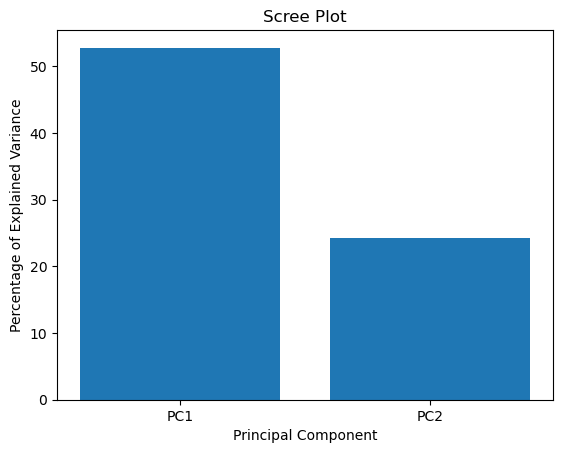

In [337]:
## Scree plot

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ["PC" + str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree Plot")
plt.show()

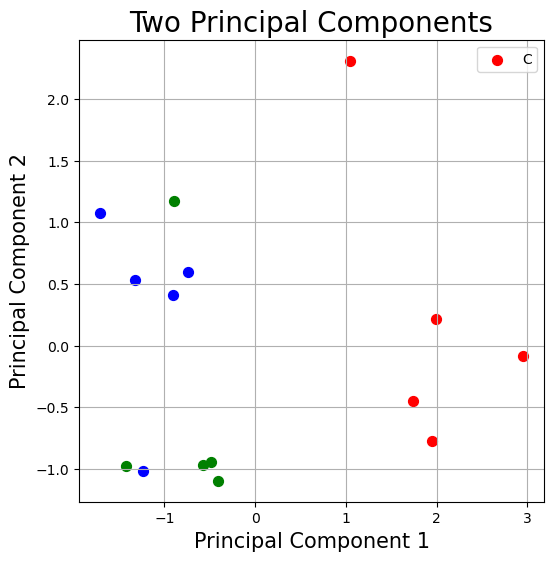

In [339]:
## Visualise the 2D graph in a score plot.

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Principal Component 1", fontsize = 15)
ax.set_ylabel("Principal Component 2", fontsize = 15)
ax.set_title("Two Principal Components", fontsize = 20)

Variety = ["A", "B", "C"]
colors = ["red", "green", "blue"]

for Variety, color in zip(Variety,colors):
    indicesToKeep = finalDf["Variety"] == Variety
    ax.scatter(finalDf.loc[indicesToKeep, "principal component 1"]
               ,finalDf.loc[indicesToKeep, "principal component 2"]
               ,c = color
               ,s = 50)
    
ax.legend(Variety)
ax.grid()

In [345]:
#Explain the Variance

pca.explained_variance_ratio_

array([0.52849442, 0.24234006])

### Findings:
##### PC1 accounts for a majority of the variance as per scree plot. By reducing the dimensionality, there is no corrleation betwen the A, B, C varieties of Apple Juice with regards to the different sugars. The varience ratio of for PC1 is 53% & PC2 is 24% and the variance is only 77% which is well below the threshold of 85% that makes PCA appropriate. Therefore, PCA should not be used for these experiments to establish a relationship.